In [1]:
!pip install yfinance

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from sklearn.linear_model import LinearRegression

In [3]:
def give_me_df(ticker):
    """
    주어진 티커의 일일수익률을 데이타프레임 형태로 리턴한다.
    
    Input : str : ticker
    Output : pd.DataFrame : daily return of stock (given by ticker) close 
    """
    df = yf.Ticker(ticker).history(period='max')
    df[ticker] = df.Close.pct_change()
    return df[[ticker]].iloc[1:] 

In [4]:
FB = give_me_df('FB')
SPY = give_me_df('SPY')
AAPL = give_me_df('AAPL')
df = FB.join(SPY, how='inner').join(AAPL, how='inner')
df.head()

,FB,SPY,AAPL
Date,,,
2012-05-21,-0.109861,0.017188,0.058260
2012-05-22,-0.089039,0.001743,-0.007679
2012-05-23,0.032258,0.000530,0.024400
2012-05-24,0.032187,0.001965,-0.009184
2012-05-25,-0.033909,-0.003245,-0.005360


In [5]:
x_train, y_train = df[['SPY','AAPL']][-200:-100].values, df.FB[-200:-100].values
x_test, y_test = df[['SPY','AAPL']][-100:].values, df.FB[-100:].values
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(100, 2) (100,)


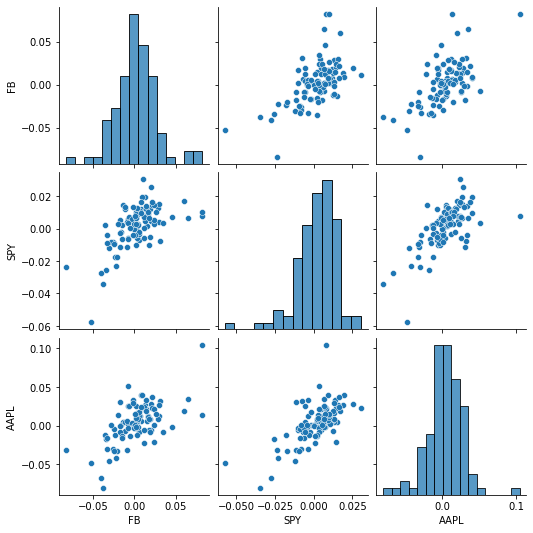

In [6]:
sns.pairplot(df.iloc[-200:-100,:]);

In [7]:
model = LinearRegression() # 리니너 리그레션 오브젝트(인스탄스) 생성 
model.fit(x_train, y_train) # 모델 트레인
y_train_pred = model.predict(x_train) 
y_test_pred = model.predict(x_test) 
print('직선의 기울기 : ', model.coef_) 
print('y 절편      : ', model.intercept_) 

직선의 기울기 :  [0.66106343 0.39674687]
y 절편      :  -0.00029016534028829125


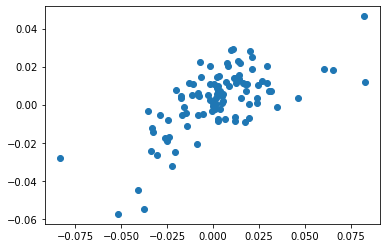

In [8]:
plt.plot(y_train, y_train_pred, 'o');

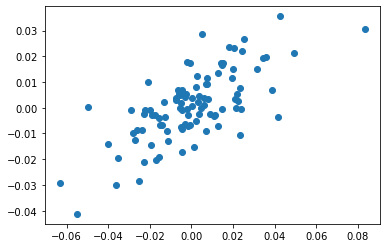

In [9]:
plt.plot(y_test, y_test_pred, 'o');

# Numpy Implementation of Linear Regression

In [10]:
ones = np.ones((x_train.shape[0],1))
X = np.concatenate([ones, x_train], axis=1) # design matrix
y = y_train.reshape((-1,1)) # (100, 1)
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print('직선의 기울기 : ', theta_hat[1:,0]) 
print('y 절편      : ', theta_hat[0,0]) 

직선의 기울기 :  [0.66106343 0.39674687]
y 절편      :  -0.00029016534028829266
